In [1]:
set.seed(9102015)

In [9]:
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Warning message:
"package 'tidyr' was built under R version 3.4.3"Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [3]:
library(statsr)

In [4]:
data(ames)

In [11]:
n <- 60
samp <- sample_n(ames, n)

In [17]:
summary(samp$area)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    572    1124    1448    1500    1687    3493 

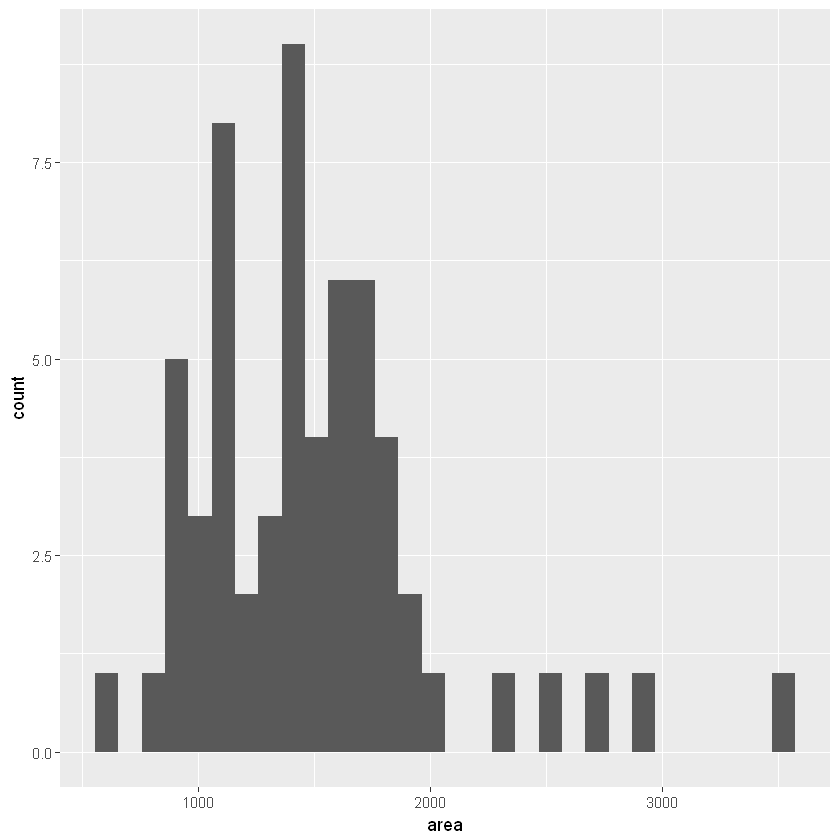

In [12]:
samp %>%
ggplot(aes(area)) +
geom_histogram(bins = 30)

In [14]:
z_star_95 <- qnorm(0.975)
z_star_95

[1] 1.959964

In [18]:
confidence_interval <- samp %>%
summarize(lower = mean(area) - z_star_95 * sd(area) / sqrt(n),
          upper = mean(area) + z_star_95 * sd(area) / sqrt(n))

In [23]:
confidence_interval

lower,upper
1369.875,1630.492


In [21]:
with(confidence_interval, (lower + upper) / 2)

[1] 1500.183

In [22]:
params <- ames %>%
summarize(mu = mean(area))
params

mu
1499.69


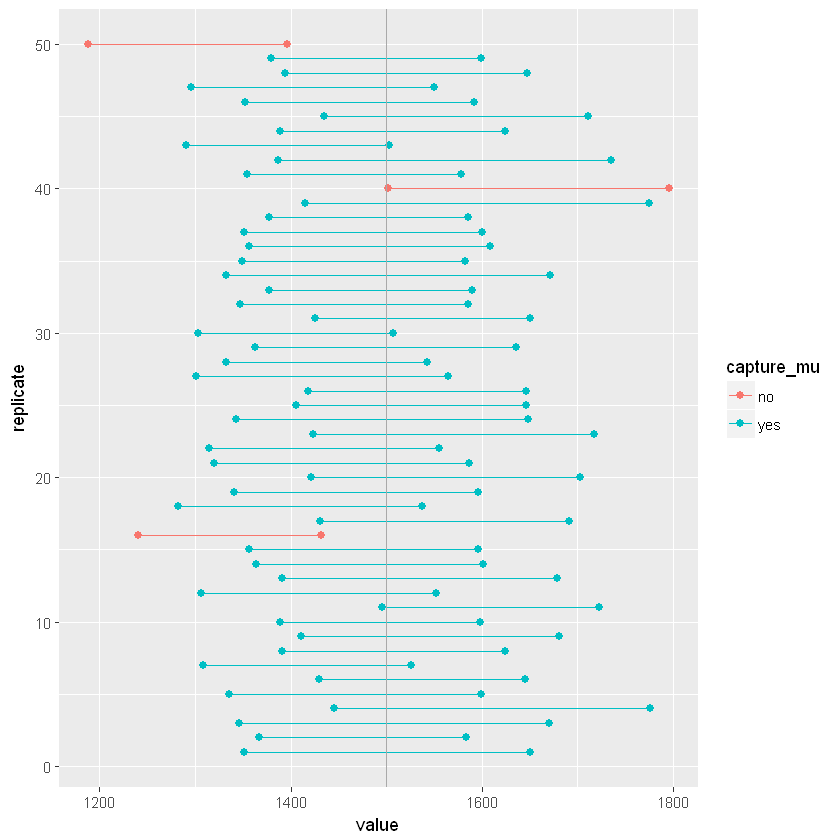

In [47]:
ci <- ames %>%
rep_sample_n(size = n, reps = 50, replace = TRUE) %>%
summarize(lower = mean(area) - z_star_95 * sd(area) / sqrt(n),
          upper = mean(area) + z_star_95 * sd(area) / sqrt(n))

ci <- ci %>%
mutate(capture_mu = ifelse(lower < params$mu & upper > params$mu, 'yes', 'no'))

melt(ci, id = c('replicate', 'capture_mu')) %>%
ggplot(aes(value, replicate, group = replicate, color = capture_mu)) +
geom_point(size = 2) +
geom_line() +
geom_vline(xintercept = params$mu, color = 'darkgray')

In [72]:
ames %>%
rep_sample_n(size = n, reps = 50, replace = TRUE) %>%
summarize(lower = mean(area) - z_star_95 * sd(area) / sqrt(n),
          upper = mean(area) + z_star_95 * sd(area) / sqrt(n))

replicate,lower,upper
1,1399.407,1639.160
2,1352.588,1597.478
3,1358.878,1557.089
4,1371.396,1569.137
5,1301.305,1534.262
6,1453.425,1745.642
7,1481.979,1771.054
8,1345.153,1585.714
9,1373.116,1612.551
10,1423.443,1723.290


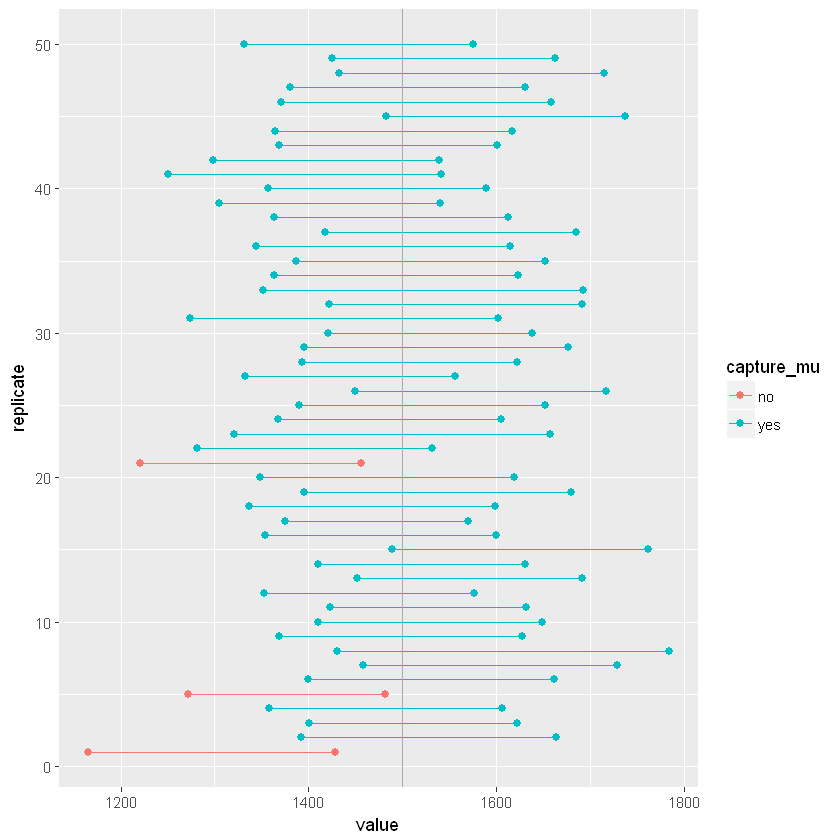

In [88]:
ci <- ames %>%
rep_sample_n(size = n, reps = 50, replace = TRUE) %>%
summarize(lower = mean(area) - z_star_95 * sd(area) / sqrt(n),
          upper = mean(area) + z_star_95 * sd(area) / sqrt(n))

ci <- ci %>%
mutate(capture_mu = ifelse(lower < params$mu & upper > params$mu, 'yes', 'no'))

melt(ci, id = c('replicate', 'capture_mu')) %>%
ggplot(aes(value, replicate, group = replicate, color = capture_mu)) +
geom_point(size = 2) +
geom_line() +
geom_vline(xintercept = params$mu, color = 'darkgray')

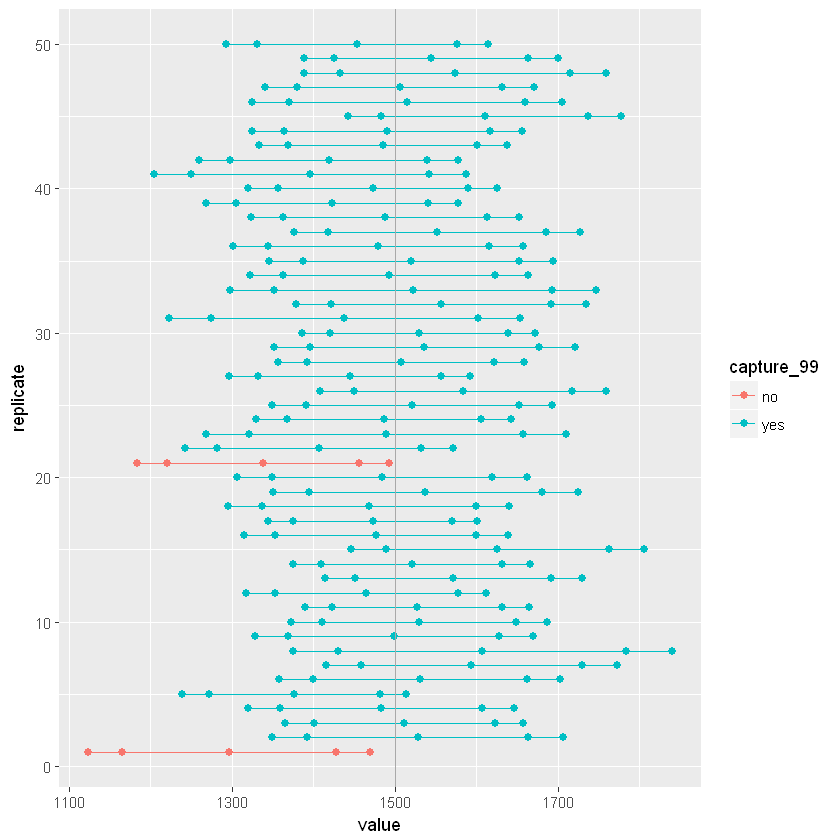

In [89]:
ci2 <- ci %>%
mutate(mean = (lower + upper) / 2,
      lower_99 = mean - (mean - lower) * z_star_99 / z_star_95,
      upper_99 = mean + (upper - mean) * z_star_99 / z_star_95,
      capture_99 = ifelse(lower_99 < params$mu & upper_99 > params$mu, 'yes', 'no'))

melt(ci2, id = c('replicate', 'capture_mu', 'capture_99')) %>%
ggplot(aes(value, replicate, group = replicate, color = capture_99)) +
geom_point(size = 2) +
geom_line() +
geom_vline(xintercept = params$mu, color = 'darkgray')